# Importing Libraries and loading the dataset

In [1]:

!pip install nltk

In [2]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import seaborn as sns
from nltk.corpus import stopwords  
from nltk.stem.lancaster import LancasterStemmer  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

# Loading the dataset and checking the first 5 rows

In [4]:
data = pd.read_csv('data.csv')
data.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

# Checking the 1st two comments.

In [5]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [6]:
data['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

# Check percentage of comments that are toxic compared to normal comments

In [7]:
data.toxic.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

# Data analysis

In [8]:
data.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

# Create a new subset of the data by only taking the 2nd column onwards

In [9]:
data_count=data.iloc[:,2:].sum()

In [10]:
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

# plotting a chart

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


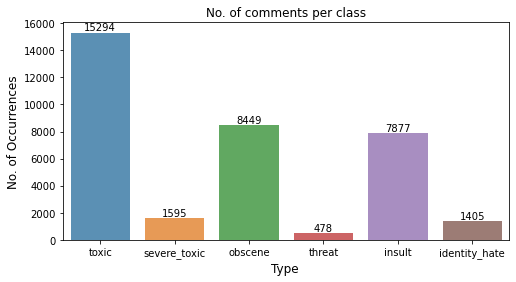

In [11]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)
plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [12]:
num_rows = len(data)
print(num_rows)

159571


# Creating a bar graph

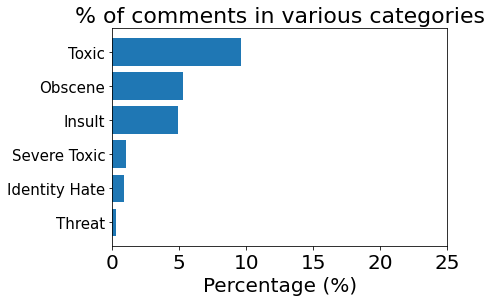

In [13]:
sum_tox = data['toxic'].sum() / num_rows * 100
sum_sev = data['severe_toxic'].sum() / num_rows * 100
sum_obs = data['obscene'].sum() / num_rows * 100
sum_thr = data['threat'].sum() / num_rows * 100
sum_ins = data['insult'].sum() / num_rows * 100
sum_ide = data['identity_hate'].sum() / num_rows * 100
ind = np.arange(6)
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)
plt.gca().invert_yaxis()
plt.show()

# Text preprocessing steps - remove numbers, capital letters, punctuation

In [14]:
import re
import string
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
data['comment_text'] = data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

# Separate our dataset into 6 sections. Each section is comment and a category.

In [15]:
data_tox = data.loc[:,['id','comment_text','toxic']]

In [16]:
data_tox['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [17]:
data_sev = data.loc[:,['id','comment_text','severe_toxic']]

In [18]:
data_obs = data.loc[:,['id','comment_text','obscene']]

In [19]:
data_thr = data.loc[:,['id','comment_text','threat']]

In [20]:
data_ins = data.loc[:,['id','comment_text','insult']]

In [21]:
data_ide = data.loc[:,['id','comment_text','identity_hate']]

# Creating WordCloud Useful to show the words which occur most frequently for each category


In [28]:

from PIL import Image

from nltk.corpus import stopwords

# Balancing the dataset

In [29]:
data_tox.head()

id                                       comment_text  toxic
0  0000997932d777bf  explanation why the edits made under my userna...      0
1  000103f0d9cfb60f  d aww  he matches this background colour i m s...      0
2  000113f07ec002fd  hey man  i m really not trying to edit war  it...      0
3  0001b41b1c6bb37e    more i can t make any real suggestions on im...      0
4  0001d958c54c6e35  you  sir  are my hero  any chance you remember...      0

In [30]:
data_tox_1 = data_tox[data_tox['toxic'] == 1].iloc[0:5000,:]
data_tox_1.shape

(5000, 3)

In [31]:
data_tox_0 = data_tox[data_tox['toxic'] == 0].iloc[0:5000,:]

In [32]:
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)
data_tox_done.shape

(10000, 3)

In [33]:
data_sev[data_sev['severe_toxic'] == 1].count()

id              1595
comment_text    1595
severe_toxic    1595
dtype: int64

In [34]:
data_sev_1 = data_sev[data_sev['severe_toxic'] == 1].iloc[0:1595,:]
data_sev_0 = data_sev[data_sev['severe_toxic'] == 0].iloc[0:1595,:]
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)
data_sev_done.shape

(3190, 3)

In [35]:
data_obs[data_obs['obscene'] == 1].count()

id              8449
comment_text    8449
obscene         8449
dtype: int64

In [36]:
data_obs_1 = data_obs[data_obs['obscene'] == 1].iloc[0:5000,:]
data_obs_0 = data_obs[data_obs['obscene'] == 0].iloc[0:5000,:]
data_obs_done = pd.concat([data_obs_1, data_obs_0], axis=0)
data_obs_done.shape

(10000, 3)

In [37]:
data_thr[data_thr['threat'] == 1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [38]:
data_thr_1 = data_thr[data_thr['threat'] == 1].iloc[0:478,:]
data_thr_0 = data_thr[data_thr['threat'] == 0].iloc[0:1912,:]  
data_thr_done = pd.concat([data_thr_1, data_thr_0], axis=0)
data_thr_done.shape

(2390, 3)

In [39]:
data_ins[data_ins['insult'] == 1].count()

id              7877
comment_text    7877
insult          7877
dtype: int64

In [40]:
data_ins_1 = data_ins[data_ins['insult'] == 1].iloc[0:5000,:]
data_ins_0 = data_ins[data_ins['insult'] == 0].iloc[0:5000,:]
data_ins_done = pd.concat([data_ins_1, data_ins_0], axis=0)
data_ins_done.shape

(10000, 3)

In [41]:
data_ide[data_ide['identity_hate'] == 1].count()

id               1405
comment_text     1405
identity_hate    1405
dtype: int64

In [42]:
data_ide_1 = data_ide[data_ide['identity_hate'] == 1].iloc[0:1405,:] # 20%
data_ide_0 = data_ide[data_ide['identity_hate'] == 0].iloc[0:5620,:] # 80%
data_ide_done = pd.concat([data_ide_1, data_ide_0], axis=0)
data_ide_done.shape

(7025, 3)

# Import relevant packages for modelling

In [43]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# Creating a simple function that takes in a dataset and split it into train,test and allows user to choose dataset, toxicity label, vectorizer and number of ngrams

In [44]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    X = df_done.comment_text
    y = df_done[label]
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

  
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) 
    X_test_cv1  = cv1.transform(X_test)     
    
    ''' Initialize all model objects and fit the models on the training data '''
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    
    f1_score_data = {'F1 Score':[f1_score(randomforest.predict(X_test_cv1), y_test)]} 
    
    df_f1 = pd.DataFrame(f1_score_data, index=['Random Forest'])  

    return df_f1

# create a TF-IDF vectorizer object for each category and calculate the F1 score

In [69]:
import time

t0 = time.time()

df_tox_cv = cv_tf_train_test(data_tox_done, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv.rename(columns={'F1Score': 'F1 Score(toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

rdf done
Time taken: 7.513247728347778 seconds


F1 Score
Random Forest  0.838055

In [70]:
t0 = time.time()

df_sev_cv = cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_sev_cv

rdf done
Time taken: 1.3290164470672607 seconds


F1 Score(severe_toxic)
Random Forest                0.934874

In [47]:
t0 = time.time()

df_obs_cv = cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (1,1))
df_obs_cv.rename(columns={'Score': 'F1 Score(obscene)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_obs_cv

rdf done
Time taken: 6.753994464874268 seconds


F1 Score(obscene)
Random Forest           0.909091

In [48]:
t0 = time.time()

df_thr_cv = cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_thr_cv

rdf done
Time taken: 0.8150134086608887 seconds


F1 Score(threat)
Random Forest          0.795539

In [49]:
t0 = time.time()

df_ins_cv = cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ins_cv

rdf done
Time taken: 7.078986406326294 seconds


F1 Score(insult)
Random Forest          0.883993

In [50]:
t0 = time.time()

df_ide_cv = cv_tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ide_cv

rdf done
Time taken: 3.7499992847442627 seconds


F1 Score(identity_hate)
Random Forest                 0.768448

#  combining the dataframes into a master dataframe to compare F1 scores across all categories.

In [51]:
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ide_cv], axis=1)
f1_all

F1 Score(toxic)  F1 Score(severe_toxic)  F1 Score(obscene)  \
Random Forest         0.838055                0.934874           0.909091   

               F1 Score(insult)  F1 Score(threat)  F1 Score(identity_hate)  
Random Forest          0.883993          0.795539                 0.768448

In [52]:
f1_all_trp = f1_all.transpose()
f1_all_trp

Random Forest
F1 Score(toxic)               0.838055
F1 Score(severe_toxic)        0.934874
F1 Score(obscene)             0.909091
F1 Score(insult)              0.883993
F1 Score(threat)              0.795539
F1 Score(identity_hate)       0.768448

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np

In [61]:
f1_all_trp

Random Forest
F1 Score(toxic)               0.838055
F1 Score(severe_toxic)        0.934874
F1 Score(obscene)             0.909091
F1 Score(insult)              0.883993
F1 Score(threat)              0.795539
F1 Score(identity_hate)       0.768448

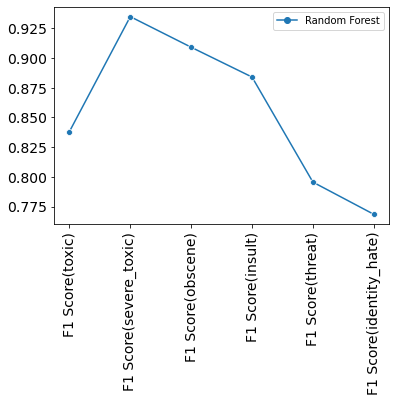

In [68]:
sns.lineplot(data=f1_all_trp,  size=None, markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')


In [63]:
data_tox_done.head()

id                                       comment_text  toxic
6   0002bcb3da6cb337       cocksucker before you piss around on my work      1
12  0005c987bdfc9d4b  hey    what is it       talk   what is it    a...      1
16  0007e25b2121310b  bye    don t look  come or think of comming ba...      1
42  001810bf8c45bf5f  you are gay or antisemmitian    archangel whit...      1
43  00190820581d90ce           fuck your filthy mother in the ass  dry       1

In [64]:
X = data_tox_done.comment_text
y = data_tox_done['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  
X_test_fit = tfv.transform(X_test)  

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)


randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
randomforest

# Pickling trained RandomForest models

In [65]:
import pickle

In [66]:
def pickle_model(df, label):
    
    X = df.comment_text
    y = df[label]

   
    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    X_vect = tfv.fit_transform(X)  
    
   
    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
        pickle.dump(tfv, f)   
        
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_vect, y)

   
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
        pickle.dump(randomforest, f)

In [67]:
datalist = [data_tox_done, data_sev_done, data_obs_done, data_ins_done, data_thr_done, data_ide_done]
label = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']

for i,j in zip(datalist,label):
    pickle_model(i, j)